# Practical Machine Learning 
### Project: Model Selection

# Abstract

# Part 1: Business and Data Understanding

### Q. Identify a suitable dataset for your canditate question(s)

Go have a look at any of these websites:

* https://www.kaggle.com/datasets 
* https://datasetsearch.research.google.com/
* https://data.gov.uk/

Find an interesting looking data set related to your problem domain and get a copy of it


https://data.gov.uk/dataset/6efe5505-941f-45bf-b576-4c1e09b579a1/road-traffic-accidents

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Q. Define the problem domain

I want to look more into the road accidents in Leeds
 Database to see what interesting relations I can find. This can be a good data prediction on massive dissasters. Age, sex of people involved in road traffic, lighthing conditions

### Q. Identify candidate questions for your machine learning project

What is the ratio of accidents? What is the average age of people involved in road accidents? what time of road if the accident happening?

In [2]:
data = pd.read_csv('/content/Traffic accidents_2019_Leeds.csv')

In [3]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Reference Number     1907 non-null   object
 1   Grid Ref: Easting    1907 non-null   int64 
 2   Grid Ref: Northing   1907 non-null   int64 
 3   Number of Vehicles   1907 non-null   int64 
 4   Accident Date        1907 non-null   object
 5   Time (24hr)          1907 non-null   int64 
 6   1st Road Class       1907 non-null   int64 
 7   1st Road Class & No  1907 non-null   object
 8   Road Surface         1907 non-null   int64 
 9   Lighting Conditions  1907 non-null   int64 
 10  Weather Conditions   1907 non-null   int64 
 11  Local Authority      1907 non-null   object
 12  Vehicle Number       1907 non-null   int64 
 13  Type of Vehicle      1907 non-null   int64 
 14  Casualty Class       1907 non-null   int64 
 15  Casualty Severity    1907 non-null   int64 
 16  Sex of

,Reference Number,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,1st Road Class & No,Road Surface,Lighting Conditions,Weather Conditions,Local Authority,Vehicle Number,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty
0,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,1,E08000035,2,11,2,3,2,6
1,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,1,E08000035,2,11,2,3,1,9
2,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,1,E08000035,2,11,2,3,2,39
3,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,1,E08000035,2,11,2,3,1,5
4,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,1,E08000035,2,11,2,3,2,8


In [4]:
df = data.loc[:, ['Number of Vehicles','1st Road Class', 'Road Surface', 'Lighting Conditions', 'Weather Conditions', 'Vehicle Number', 'Type of Vehicle', 'Casualty Class','Casualty Severity', 'Sex of Casualty', 'Age of Casualty' ]]
df.head()

,Number of Vehicles,1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Vehicle Number,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty
0,2,3,1,1,1,2,11,2,3,2,6
1,2,3,1,1,1,2,11,2,3,1,9
2,2,3,1,1,1,2,11,2,3,2,39
3,2,3,1,1,1,2,11,2,3,1,5
4,2,3,1,1,1,2,11,2,3,2,8


In [5]:
allcols =['Number of Vehicles','1st Road Class', 'Road Surface', 'Lighting Conditions', 'Weather Conditions', 'Vehicle Number', 'Type of Vehicle', 'Casualty Class','Casualty Severity', 'Sex of Casualty', 'Age of Casualty' ]
for col in allcols:
  typekeys = df[col].value_counts().keys()
  print (typekeys)

Int64Index([2, 1, 3, 4, 5, 6], dtype='int64')
Int64Index([6, 3, 1, 4, 2, 5], dtype='int64')
Int64Index([1, 2, 4, 5, 3, 9], dtype='int64')
Int64Index([1, 4, 6, 7, 5], dtype='int64')
Int64Index([1, 2, 5, 4, 8, 3, 9, 7, 6], dtype='int64')
Int64Index([1, 2, 3, 4, 5], dtype='int64')
Int64Index([9, 1, 3, 19, 11, 8, 5, 4, 2, 21, 20, 10, 22, 97, 90, 16, 17], dtype='int64')
Int64Index([1, 2, 3], dtype='int64')
Int64Index([3, 2, 1], dtype='int64')
Int64Index([1, 2], dtype='int64')
Int64Index([27, 30, 20, 26, 29, 25, 24, 22, 32, 21, 19, 23, 28, 35, 40, 39, 34,
            18, 38, 31, 33, 36, 45, 51, 41, 43, 17, 44, 37, 12, 46, 16, 52, 48,
            50, 49, 47, 11, 54, 42, 55, 58, 56,  8, 59, 53, 57, 10, 63, 15, 13,
            61, 60, 62, 64,  9, 69,  7, 70,  5, 14,  6, 67,  2, 73, 71, 68,  3,
            74, 75,  4,  1, 81, 72, 89, 66, 83, 65, 78, 77, 79, 86, 76, 82, 88,
            85, 80, 95, 84, 92, 87, 90],
           dtype='int64')


In [6]:
df.to_csv('road_accident.csv')

### Q. Generate a descriptive statistics report for the columns in your dataset

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number of Vehicles,1907.0,1.969061,0.819226,1.0,2.0,2.0,2.0,6.0
1st Road Class,1907.0,4.399580,1.802633,1.0,3.0,6.0,6.0,6.0
Road Surface,1907.0,1.321972,0.604421,1.0,1.0,1.0,2.0,9.0
Lighting Conditions,1907.0,1.911904,1.559791,1.0,1.0,1.0,4.0,7.0
Weather Conditions,1907.0,1.241741,0.815497,1.0,1.0,1.0,1.0,9.0
Vehicle Number,1907.0,1.557944,0.619865,1.0,1.0,2.0,2.0,5.0
Type of Vehicle,1907.0,8.344520,5.858360,1.0,9.0,9.0,9.0,97.0
Casualty Class,1907.0,1.567383,0.767278,1.0,1.0,1.0,2.0,3.0
Casualty Severity,1907.0,2.801783,0.426726,1.0,3.0,3.0,3.0,3.0
Sex of Casualty,1907.0,1.397483,0.489506,1.0,1.0,1.0,2.0,2.0


In [8]:
df.corr()

,Number of Vehicles,1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Vehicle Number,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty
Number of Vehicles,1.000000,-0.286504,-0.000004,-0.071934,-0.047699,0.552668,-0.010240,-0.435307,0.098010,-0.002026,0.064569
1st Road Class,-0.286504,1.000000,0.021504,0.041635,0.057030,-0.157368,-0.071319,0.206983,-0.067495,0.005421,-0.098044
Road Surface,-0.000004,0.021504,1.000000,0.193159,0.455117,-0.072228,0.019035,0.004103,-0.047385,0.005223,0.000661
Lighting Conditions,-0.071934,0.041635,0.193159,1.000000,0.102957,-0.068517,0.014692,0.046171,-0.067238,-0.062684,-0.037633
Weather Conditions,-0.047699,0.057030,0.455117,0.102957,1.000000,-0.047964,0.012649,0.017136,-0.012999,-0.035801,0.015648
Vehicle Number,0.552668,-0.157368,-0.072228,-0.068517,-0.047964,1.000000,-0.103529,-0.369214,0.146586,-0.018885,0.063955
Type of Vehicle,-0.010240,-0.071319,0.019035,0.014692,0.012649,-0.103529,1.000000,0.198569,0.041183,0.093097,0.044947
Casualty Class,-0.435307,0.206983,0.004103,0.046171,0.017136,-0.369214,0.198569,1.000000,-0.113017,0.146568,-0.141475
Casualty Severity,0.098010,-0.067495,-0.047385,-0.067238,-0.012999,0.146586,0.041183,-0.113017,1.000000,0.098581,-0.084154
Sex of Casualty,-0.002026,0.005421,0.005223,-0.062684,-0.035801,-0.018885,0.093097,0.146568,0.098581,1.000000,0.037637


In [9]:
features = ['Number of Vehicles', '1st Road Class', 'Road Surface','Lighting Conditions', 'Weather Conditions', 'Vehicle Number',
       'Type of Vehicle', 'Casualty Class', 
       'Sex of Casualty', 'Age of Casualty']
       

In [10]:
x = df.loc[:, features]
y = df.loc[:, 'Casualty Severity']
x.dropna(inplace=True)
y = y.iloc[x.index]


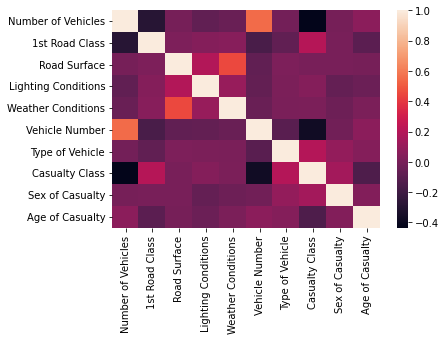

In [11]:
corr = x.corr()
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.heatmap(corr)
plt.show()

# Part 2: Data Preparation

### Q. Discuss the following types of missing data and how they would be handled in reference to your dataset where applicable.
*	Missing completely at random (MCAR)
*	Missing at random (MAR)
*	Missing Not at Random (MNAR)

*There is not mising values in the database.*





Q. Is there any correlation in the data? How would you decide which columns to keep?

I have created a new dataframe with the columns that cointain numbers. The following columns have been not be included as it didnt provide any information for ML:Reference Number, Grid Ref: Easting, Grid Ref: Northing, Accident Date, Time (24hr), 1st Road Class & No, Local Authorit 






  

Q. Is there any imbalance in the label
?

no there isnt....see the code (above) with values for all the columns 

Q. Are there any outliers in the dataset? What do you do with them?

Casualty Severity Column, this describe how serious was the casuality; this database contains 3 categories: 1 = Fatal, 2 = Serious, 3 = Slight 

Q. Are there any strings in the features that need to be converted to integers? Do you select One-Hot encoding or Label Encoding?

No the data has been convert to integers and I have only use columns that are significant for machine learning 

Q. Split the data for TRAINING and SCORING (testing). OPTIONAL: Discuss what problems could happen we have poor distribution b/w training and testing?

# Part 3: Model Selection

Screen shor for my pipeline for the ML. My label column is Casualty 


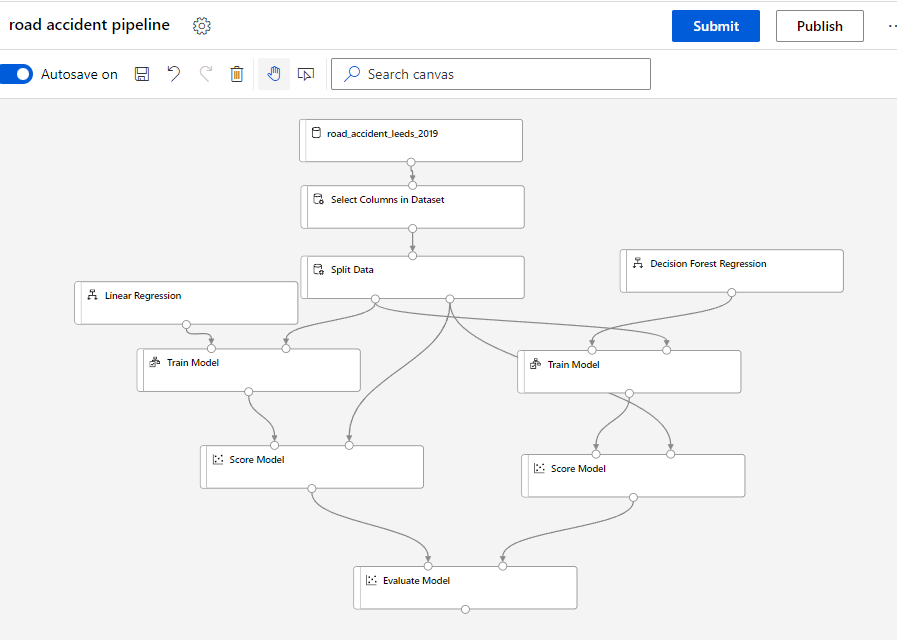

### Q. Use the cheat sheet below to choose the algorithm/estimator suitable for building a model to address your candidate question(s)

* https://scikit-learn.org/stable/tutorial/machine_learning_map/

# Part 4: Model Evaluation

### Q. Identify which of the statistical measures below are suitable for the evaluation of your model.

Classification Metrics:
* Accuracy
* Precision
* Recall
* F1 Score

Regression Metrics:
    
* Mean absolute error (MAE)
* Root mean squared error (RMSE)
* Relative absolute error (RAE)
* Relative squared error (RSE)
* Mean Zero One Error (MZOE)
* Coefficient of determination

 

Based on the evaluation results for the ML using Linear regression and Desicion Forest regression, the model I chose for the ML is the one on the left: Linear regression. 
Root mean square error, relative squared error and the coeffcient of detemination are more favorable for the Linear regression




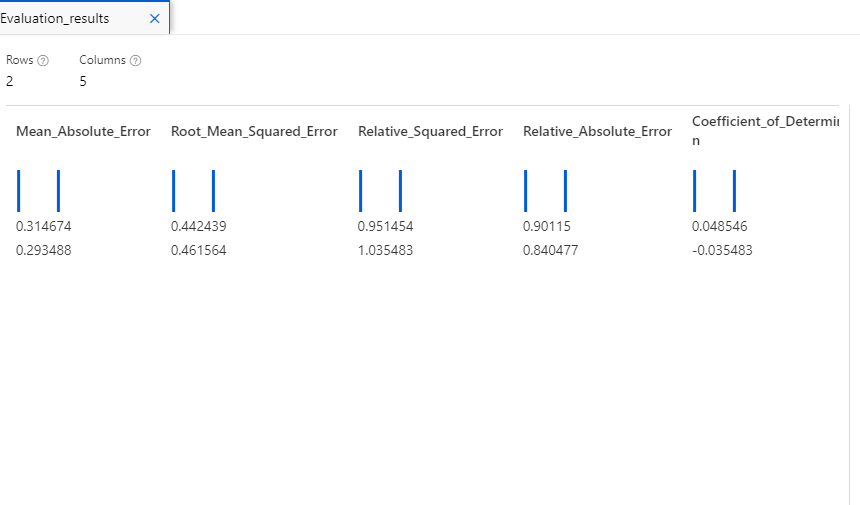

See below the final pipeline 

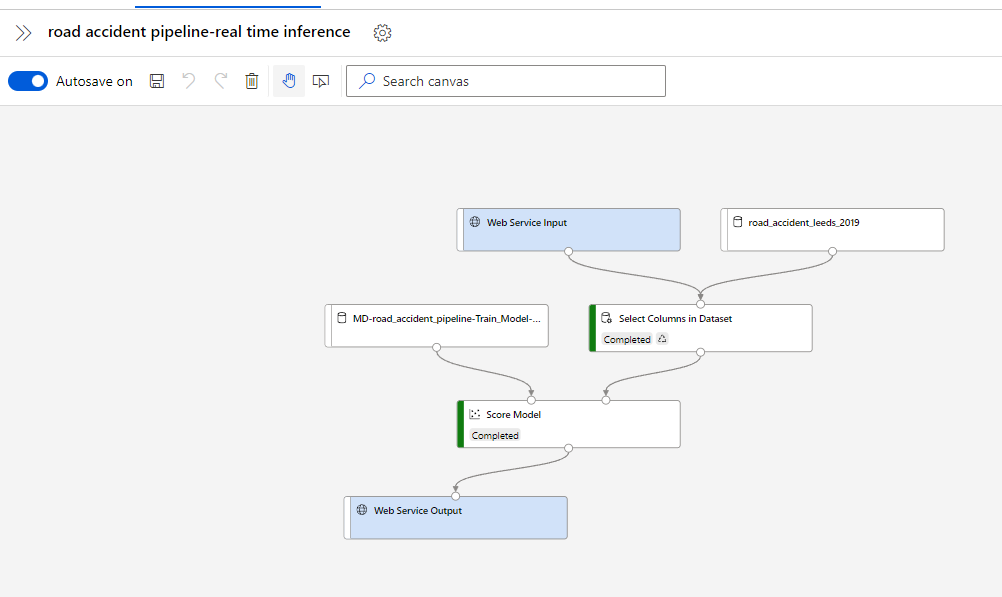

# Part 5: Stretch - Model Deployment

### Q. Evaluate the open-source app framework for Machine Learning model deployment below in your own time.

* https://streamlit.io/

In [12]:
import urllib.request
import json
import os
import ssl

def allowSelfSignedHttps(allowed):
    # bypass the server certificate verification on client side
    if allowed and not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None):
        ssl._create_default_https_context = ssl._create_unverified_context

allowSelfSignedHttps(True) # this line is needed if you use self-signed certificate in your scoring service.

# Request data goes here
data = {
    "Inputs": {
    },
    "GlobalParameters": {
    }
}

body = str.encode(json.dumps(data))

url = 'http://3533ee04-b04c-4c55-874c-f86dc532fc89.centralindia.azurecontainer.io/score'
api_key = 'vzcGMGPxdZbeoTS7A840AL0RTeWEaLwW' # Replace this with the API key for the web service
headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key)}

req = urllib.request.Request(url, body, headers)

try:
    response = urllib.request.urlopen(req)

    result = response.read()
    print(result)
except urllib.error.HTTPError as error:
    print("The request failed with status code: " + str(error.code))

    # Print the headers - they include the requert ID and the timestamp, which are useful for debugging the failure
    print(error.info())
    print(error.read().decode("utf8", 'ignore'))

The request failed with status code: 400
Access-Control-Allow-Origin: *
Content-Length: 183
Content-Type: application/json
Date: Fri, 18 Mar 2022 13:31:55 GMT
Server: nginx/1.14.0 (Ubuntu)
X-Ms-Request-Id: d5facdcc-63ad-4312-af0d-cf578f63288f
X-Ms-Run-Fn-Exec-Ms: 1.285
X-Ms-Run-Function-Failed: False
Connection: close


{"error": {"code": 400, "message": "Input Data Error. Input data are inconsistent with schema.\nSchema: {'WebServiceInput0': '0:Dataset'}\nData: {}\nNoneType: None\n", "details": ""}}
